In [5]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
# using colors from matplotlib default color cycle
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']


# Legacy Catalogs

* JM sent a match between Virgo v1 catalogs and Legacy DR9 on 1/29/21
* the catalogs are split into North and South, which is a designation relative to the Legacy Survey, vs one based on declination

In [100]:
legtabledir = '/home/rfinn/research/Virgo/tables-moustakas/'
legnorth = Table.read(legtabledir+'vf_north_v1_main_dr9north.fits')
legsouth = Table.read(legtabledir+'vf_north_v1_main_dr9south.fits')

## Matching Statistics

In [101]:
northflag = (legnorth['BRICKID'] > 0) & (legnorth['TYPE'] != 'DUP')
southflag = (legsouth['BRICKID'] > 0) & (legsouth['TYPE'] != 'DUP')

In [102]:
onematch = (northflag | southflag)
print('number with at least one match = {:d}/{:d} ({:.1f}%)'.format(sum(onematch),len(onematch),sum(onematch)/len(onematch)*100))

number with at least one match = 6714/6797 (98.8%)


In [103]:
print('number in both catalogs = ',sum(northflag & southflag))
bothflag = northflag & southflag

number in both catalogs =  392


In [104]:
nduplicateflag = legnorth['TYPE'] == 'DUP'
sduplicateflag = legsouth['TYPE'] == 'DUP'
print(sum(nduplicateflag & sduplicateflag))

0


In [106]:
# write out table with no matches

v.main[~onematch].write(legtabledir+'vf_north_v1_main_dr9_nomatch.fits',format='fits',overwrite=True)

# Objects that are in both N and S Catalogs

In [107]:
# compare fluxes
bands = ['G','R','Z']
bands = ['W1','W2','W3','W4']
colnames = ['FLUX_{}'.format(b) for b in bands]
print(colnames)

['FLUX_W1', 'FLUX_W2', 'FLUX_W3', 'FLUX_W4']


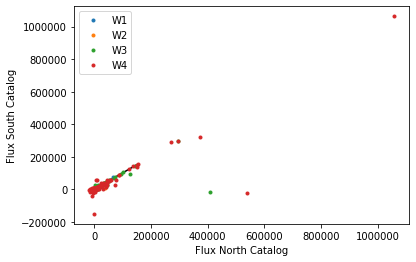

In [109]:
# print flux
plt.figure()
xl = np.linspace(0,150000,20)
plt.plot(xl,xl,'k-')
for i,c in enumerate(colnames):
    plt.plot(legnorth[c][bothflag],legsouth[c][bothflag],'b.',color=mycolors[i],label=bands[i])
    plt.xlabel('Flux North Catalog')
    plt.ylabel('Flux South Catalog')
plt.legend()
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')


# Read in Virgo Tables

In [8]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'

In [9]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'
%run ~/github/Virgo/programs/readtables.py

# Look at the Spatial Distribution

Text(0.5, 1.0, 'Legacy Survey Photometry of Virgo Filament Galaxies')

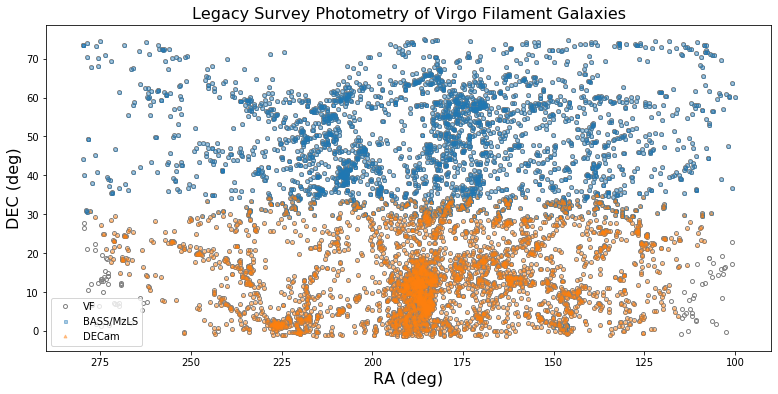

In [110]:
plt.figure(figsize=(13,6))
cats = [v.main,legnorth,legsouth]
labels = ['VF','BASS/MzLS','DECam']
symbols = ['o','s','^']
markersizes = [4,3,3]
alphas = [1,.4,.4]
mfcs = ['None',mycolors[0],mycolors[1]]
colors = ['0.5',mycolors[0],mycolors[1]]
for i,c in enumerate(cats):
    plt.plot(c['RA'],c['DEC'],'k.',marker=symbols[i],color=colors[i],markersize=markersizes[i],mfc=mfcs[i],alpha=alphas[i],label=labels[i])
plt.xlim(90,290)
plt.xlabel('RA (deg)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.legend()#loc='lower right')
plt.gca().invert_xaxis()
plt.title('Legacy Survey Photometry of Virgo Filament Galaxies',fontsize=16)

In [ ]:
plt.figure(figsize=(13,6))
cats = [v.main,legnorth,legsouth]
labels = ['VF','BASS/MzLS','DECam']
symbols = ['o','s','^']
markersizes = [4,3,3]
alphas = [1,.4,.4]
mfcs = ['None',mycolors[0],mycolors[1]]
colors = ['0.5',mycolors[0],mycolors[1]]
for i,c in enumerate(cats):
    plt.plot(c['RA'],c['DEC'],'k.',marker=symbols[i],color=colors[i],markersize=markersizes[i],mfc=mfcs[i],alpha=alphas[i],label=labels[i])
plt.xlim(90,290)
plt.xlabel('RA (deg)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.legend()#loc='lower right')
plt.gca().invert_xaxis()
plt.title('Legacy Survey Photometry of Virgo Filament Galaxies',fontsize=16)


In [111]:
v.main[~onematch]

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,name
,,,,arcsec,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bytes38,bytes8
VFID3115,279.48042599999997,27.793224,3145.0,36.738487,True,UGC11307,0,0,0,UGC 11307,True,False,False,False,False,False,False,True,True,False,VFID3115-UGC11307,VFID3115
VFID3206,279.3589815,26.4170734,3205.4,41.698578,True,NGC6671,0,0,0,NGC 6671,True,False,False,False,False,False,False,True,False,False,VFID3206-NGC6671,VFID3206
VFID3468,100.7854545,22.8738922,1294.9,30.069157,True,UGC03516,0,0,0,UGC 03516,True,False,False,False,False,False,False,True,False,False,VFID3468-UGC03516,VFID3468
VFID3516,276.4101045,22.3273564,3133.5,27.804895,True,UGC11229,634748,148423,0,UGC 11229,True,True,True,False,False,False,False,True,False,True,VFID3516-UGC11229,VFID3516
VFID3613,278.513577,21.1316744,3061.0,19.866495,True,PGC166546,634762,148437,0,2MFGC 14475,True,True,True,False,False,False,False,True,False,True,VFID3613-2MFGC14475,VFID3613
VFID3627,276.315474,20.9130018,3203.0,30.138474,True,PGC061855,634747,148422,0,CGCG 114-006,True,True,True,False,False,False,False,True,False,True,VFID3627-CGCG114-006,VFID3627
VFID3747,274.38440549999996,19.44465,2951.0,24.553944,True,PGC061689,0,0,0,CGCG 113-034,True,False,False,False,False,False,False,True,False,False,VFID3747-CGCG113-034,VFID3747
VFID3762,103.478541,19.2996389,1266.6,67.16164,True,UGC03587,0,0,0,UGC 03587,True,False,False,False,False,False,False,True,True,False,VFID3762-UGC03587,VFID3762


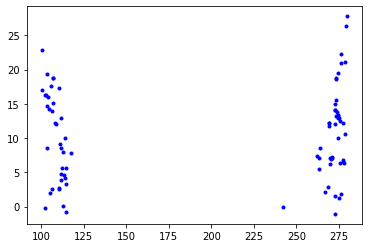

In [112]:
plt.plot(v.main['RA'][~onematch],v.main['DEC'][~onematch],'b.')

In [115]:
sum(~onematch & v.main['A100flag'])

11

* keep unmatched in catalog, but have legacy flag
* show CO

# Creating test sample for John's Photometry Code

* we want ~100-200 galaxies
* idea is to select filament galaxies
* cross-match with John's line-matched group catalog
  * try to keep most with group sizes < 5 arcmin
  
  

In [19]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'
%run ~/github/Virgo/programs/readtables.py

In [20]:
print(len(v.env),len(v.main))

6797 6797


In [2]:
gtab = Table.read('/home/rfinn/research/Virgo/tables-moustakas/vf_north_v1_main_groups.fits')

In [116]:
gtab

VFID,VF_ID,RA,DEC,RA_ORIG,DEC_ORIG,RADIUS,GALAXY,SGA_ID,PGC,PA_INIT,BA_INIT,DIAM_INIT,MAG_INIT,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER
bytes8,int64,float64,float64,float64,float64,float32,bytes28,int64,int32,float32,float32,float32,float32,int64,bytes33,int16,bool,float64,float64,float32
VFID0000,0,185.86993390645486,74.95235136292737,185.86877249999998,74.9522485,23.829847,NGC4363,521041,40233,11.151623,0.8043014,1.145519,14.544,0,NGC4363,1,True,185.86993390645486,74.95235136292737,1.145519
VFID0001,1,182.20769836714535,74.9042399251265,182.208,74.9042778,49.6731,NGC4133,561708,38578,136.89676,0.6498312,2.8770778,13.009,1,NGC4133,1,True,182.20769836714535,74.9042399251265,2.8770778
VFID0002,2,145.9443272827499,74.85993842731682,145.944663,74.8595778,62.3909,NGC2977,703485,27845,145.37277,0.47907138,2.1300297,13.274,2,NGC2977,1,True,145.9443272827499,74.85993842731682,2.1300297
VFID0003,3,185.57226687661378,74.83847214593577,185.5730835,74.8383889,26.128908,PGC040048,627180,40048,159.05542,0.85205746,1.4007422,15.027,3,PGC040048,1,True,185.57226687661378,74.83847214593577,1.4007422
VFID0004,4,182.8281922184738,74.80861419523252,182.82775049999998,74.8082222,40.937492,UGC07189,1302185,38805,10.835036,0.84608626,2.2152128,14.724,4,UGC07189,1,True,182.8281922184738,74.80861419523252,2.2152128
VFID0005,5,173.13431932778067,74.62757234445895,173.1341835,74.6275401,48.654305,NGC3752,1024584,35608,143.57559,0.44437957,3.6023273,13.611,5,NGC3752,1,True,173.13431932778067,74.62757234445895,3.6023273
VFID0006,6,121.91264891061732,74.5847324882285,121.912404,74.5846308,26.984928,UGC04202,712369,22815,173.2446,0.18366969,1.7960624,16.0,6,UGC04202,1,True,121.91264891061732,74.5847324882285,1.7960624
VFID0007,7,118.23623000204054,74.5767084479716,118.2363,74.576533,23.448833,PGC022064,156922,22064,1.352254,0.3100875,1.3085954,16.32,7,PGC022064,1,True,118.23623000204054,74.5767084479716,1.3085954
VFID0008,8,274.94484277281185,74.56912553477393,274.943166,74.5683889,99.56834,NGC6643,382830,61742,36.83784,0.5052335,4.9255514,11.757,8,NGC6643,1,True,274.94484277281185,74.56912553477393,4.9255514


### selecting filament galaxies

In [11]:
v.env

VFID_1,prefix,radius,objname,Vcosmic,DEC,radius_flag,SGY,SGX,SGZ,NSAID,NEDname,Dmedian,nCI08,RA,Virgo_infall,Steerflag,HAflag,distSGY_Virgo,Vmodel,distSGZ_Virgo,HAobsflag,V_LG,nCI08_err,n5th_2D,name,n5th_2D_err,vr,n5th,distSGX_Virgo,n5th_err,VFID_2,flag_clus,flag_fil,flag_fie,flag_gro
bytes8,bytes38,float32,bytes28,float64,float64,bool,float64,float64,float64,int32,bytes30,float64,float64,float64,float64,bool,bool,float64,float64,float64,bool,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,bytes8,float64,float64,float64,float64
VFID0000,VFID0000-NGC4363,23.829847,NGC4363,1809.6754122333089,74.9522485,True,11.738032079989287,13.145689815736862,4.111198355924238,0,NGC 4363,0.0,0.09991016586256432,185.86877249999998,201.77575192041263,False,False,1.842051278949052,1809.6754122333089,4.526500946558278,False,189.0996603128964,0.029487553097711262,0.9794328068090807,VFID0000,0.4380156670837047,1418.8,0.09554065900799932,15.409025350662194,0.04272708163140282,VFID0000,0.0,0.0,1.0,0.0
VFID0001,VFID0001-NGC4133,49.6731,NGC4133,1081.7584723176835,74.9042778,True,7.017661982903995,7.90894905971585,2.284969213716576,0,NGC 4133,14.61835773402275,0.0805523976400113,182.208,203.4059814252294,True,False,-2.87831881813624,1722.6764108994216,2.7002718043506153,False,187.77042947419227,0.023774288452540655,0.3121251748232139,VFID0001,0.13958662167874245,1331.5,0.0672333130456668,10.172284594641182,0.030067651664526882,VFID0001,0.0,0.0,1.0,0.0
VFID0002,VFID0002-NGC2977,62.3909,NGC2977,3068.6982545259793,74.8595778,True,18.236938715608805,24.57232008873139,2.303486373551084,0,NGC 2977,41.46889533143215,0.09538853839762654,145.944663,144.2026584686125,True,False,8.34095791456857,3380.6160975434336,2.7187889641851237,False,187.01343907482146,0.028153036947034134,0.9613015495936771,VFID0002,0.4299071223534695,3049.4,0.17530005643618327,26.835655623656724,0.07839656853017106,VFID0002,0.0,0.0,1.0,0.0
VFID0003,VFID0003-CGCG352-030,26.128908,PGC040048,2211.9535611201745,74.8383889,True,14.3805709158205,16.04972421363977,4.987924263296796,0,CGCG 352-030,0.0,0.3498271665702569,185.5730835,190.4148690004782,False,False,4.484590114780266,2211.9535611201745,5.403226853930836,False,188.5386921196963,0.10324822364375134,1.2147736247407455,VFID0003,0.5432632804388254,1833.0,0.43998521868016144,18.313059748565102,0.19676737161279023,VFID0003,0.0,0.0,1.0,0.0
VFID0004,VFID0004-UGC07189,40.937492,UGC07189,2065.5721196274976,74.8082222,True,13.42946756799603,15.062039166171804,4.409443857800289,0,UGC 07189,0.0,0.5790372585969432,182.82775049999998,195.01873280368198,False,False,3.5334867669557948,2065.5721196274976,4.824746448434329,False,187.5533868238159,0.17089744332841897,1.9908993941285014,VFID0004,0.890357276326895,1683.0,0.5878042339602495,17.325374701097136,0.26287404491946165,VFID0004,0.0,0.0,1.0,0.0
VFID0005,VFID0005-NGC3752,48.654305,NGC3752,2202.600664358308,74.6275401,True,14.24733084177353,16.36887945443161,3.77071849313914,0,NGC 3752,29.76487384267984,0.14780868228193356,173.1341835,186.5548487279452,True,False,4.351350040733296,2291.262875707811,4.18602108377318,False,184.608026979866,0.043624353232350664,0.710316038718794,VFID0005,0.31766298961671924,1920.1,0.14521501536328987,18.632214989356942,0.0649421291411985,VFID0005,0.0,0.0,1.0,0.0
VFID0006,VFID0006-UGC04202,26.984928,UGC04202,2785.709119178054,74.5846308,True,14.429624490058709,23.823428368645985,0.4977223192390418,0,UGC 04202,37.644717826730464,0.21554263359482356,121.912404,139.8637701304208,True,False,4.533643689018474,2668.9580301351834,0.9130249098730814,False,196.0942600047624,0.06361539687253555,0.8477993886325675,VFID0006,0.3791474128530367,2333.0,0.22690642225734137,26.086763903571317,0.10147563693973731,VFID0006,0.0,0.0,1.0,0.0
VFID0007,VFID0007-KUG0746+747,23.448833,PGC022064,2680.215400343395,74.576533,True,13.506784603390928,23.147324448597697,0.35156759342053373,0,KUG 0746+747,0.0,0.24052182742048359,118.2363,135.94014111588044,False,False,3.61080380235069

Text(0, 0.5, 'Dec (deg)')

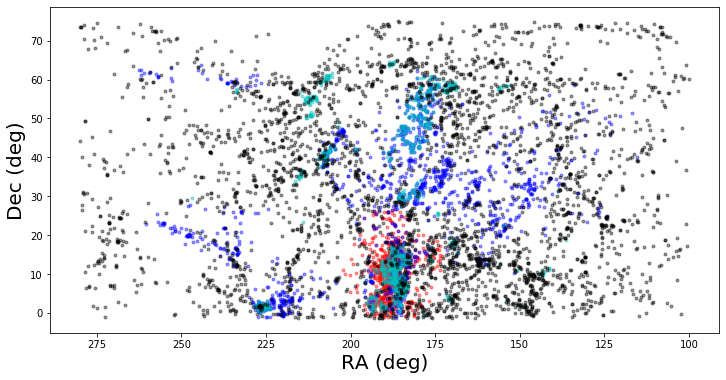

In [23]:
plt.figure(figsize=(12,6))
cluster = v.env['flag_clus'] ==1
filament = v.env['flag_fil'] == 1
group = v.env['flag_gro'] == 1
field = v.env['flag_fie'] == 1
colors= ['r','b','c','k']
flags = [cluster,filament,group,field]
for i,f in enumerate(flags):
    plt.plot(v.main['RA'][f],v.main['DEC'][f],'k.',color=colors[i],alpha=.4)
    
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('Dec (deg)',fontsize=20)

In [35]:
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])

In [36]:
allfil

{'Filament_3',
 'Filament_3b',
 'LeoII_A_Filament',
 'LeoII_B_Filament',
 'Leo_Minor_Filament',
 'NGC5353_4_Filament',
 'Ursa_Major_Cloud',
 'VirgoIII_Filament',
 'VirgoIII_Filament_Extension',
 'Virgo_Northern_Filament',
 'W-M_Sheet'}

LeoII_B_Filament
Filament_3
LeoII_A_Filament
VirgoIII_Filament
W-M_Sheet
Leo_Minor_Filament
NGC5353_4_Filament
Filament_3b
Virgo_Northern_Filament
Ursa_Major_Cloud
VirgoIII_Filament_Extension


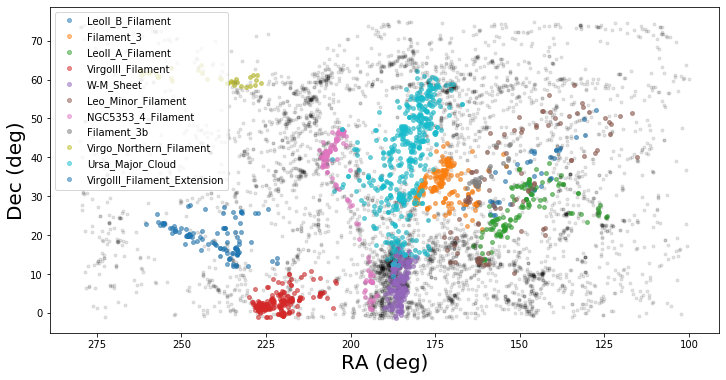

In [46]:
# select filament galaxies
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])

# plot background distribution
plt.figure(figsize=(12,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1)

# plot each filament
ncolor = 0
for i,f in enumerate(allfil):
    print(f)
    flag = v.fil['filament'] == f
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color=mycolors[ncolor],alpha=.5,label=f,markersize=4)
    ncolor += 1
    if ncolor > (len(mycolors)-1):
        ncolor = 0
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('Dec (deg)',fontsize=20)
plt.legend()

### now that we have filament galaxies, let's cross check with group 

* going to exclude W-M Sheet from this b/c it's part of virgo

In [95]:
filflag = (v.fil['filament'] != '---') 
subset_filflag = (v.fil['filament'] != '---') & (v.fil['filament'] != 'W-M_Sheet') &  (v.fil['filament'] != 'Ursa_Major_Cloud') &   (v.fil['filament'] != 'VirgoIII_Filament')


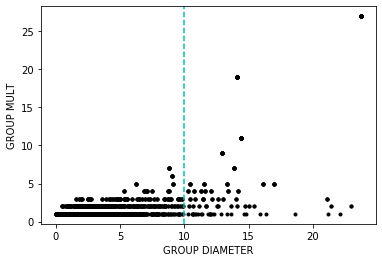

In [123]:
# group multiplicity vs group diameter

plt.figure()
plt.plot(gtab['GROUP_DIAMETER'],gtab['GROUP_MULT'],'k.')
plt.xlabel('GROUP DIAMETER')
plt.ylabel('GROUP MULT')
plt.axvline(x=10,color='c',ls='--')

number in parent sample =  1448


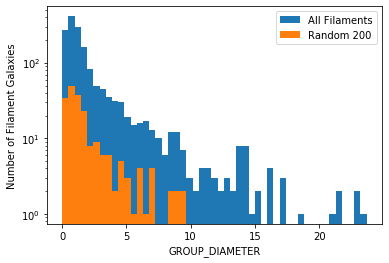

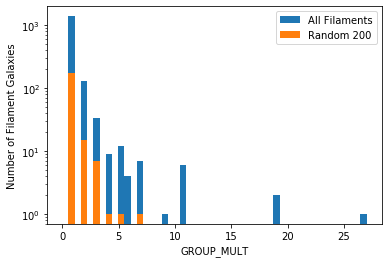

In [134]:


indices = np.arange(len(v.main))
sizeflag = (gtab['GROUP_DIAMETER'] < 10) & (gtab['GROUP_PRIMARY'])  
filament_indices = indices[filflag & sizeflag]
print('number in parent sample = ',len(filament_indices))
prob = gtab['GROUP_MULT'][filament_indices]/sum(gtab['GROUP_MULT'][filament_indices])
photsample_indices = np.random.choice(filament_indices,200,replace=False,p=prob)

plt.figure()
mybins = np.linspace(0,max(gtab['GROUP_DIAMETER'][filflag]),50)
t = plt.hist(gtab['GROUP_DIAMETER'][filflag],bins=mybins,label='All Filaments')
t = plt.hist(gtab['GROUP_DIAMETER'][photsample_indices],bins=mybins,label='Random 200')
plt.xlabel('GROUP_DIAMETER')
plt.ylabel('Number of Filament Galaxies')
plt.legend()
plt.gca().set_yscale('log')

plt.figure()
mybins = np.linspace(0,max(gtab['GROUP_MULT'][filflag]),50)
t = plt.hist(gtab['GROUP_MULT'][filflag],bins=mybins,label='All Filaments')
t = plt.hist(gtab['GROUP_MULT'][photsample_indices],bins=mybins,label='Random 200')
plt.xlabel('GROUP_MULT')
plt.ylabel('Number of Filament Galaxies')
plt.legend()
plt.gca().set_yscale('log')

LeoII_B_Filament
Filament_3
LeoII_A_Filament
VirgoIII_Filament
W-M_Sheet
Leo_Minor_Filament
NGC5353_4_Filament
Filament_3b
Virgo_Northern_Filament
Ursa_Major_Cloud
VirgoIII_Filament_Extension


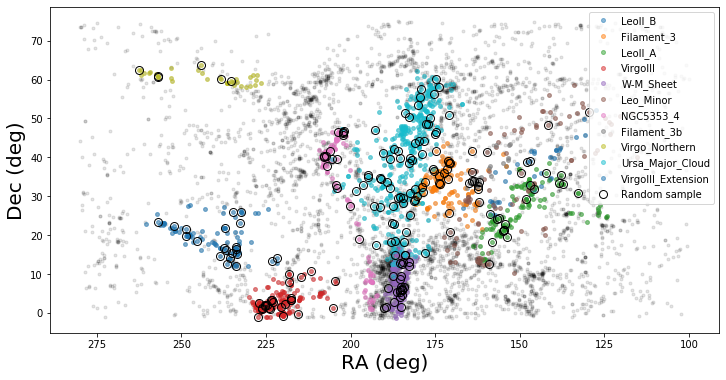

In [135]:
# select filament galaxies

allfil = set(v.fil['filament'][filflag])

# plot background distribution
plt.figure(figsize=(12,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1)

# plot each filament
ncolor = 0
for i,f in enumerate(allfil):
    print(f)
    flag = v.fil['filament'] == f
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color=mycolors[ncolor],alpha=.5,label=f.replace('_Filament',''),markersize=4)
    ncolor += 1
    if ncolor > (len(mycolors)-1):
        ncolor = 0
# plot random selection of filament galaxies
plt.plot(v.main['RA'][photsample_indices],v.main['DEC'][photsample_indices],'ko',alpha=1,mfc='None',label='Random sample',markersize=8)
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('Dec (deg)',fontsize=20)
plt.legend(loc='upper right')

In [112]:
print(sum(subset_filflag),len(photsample_indices))

719 200


### Write out random sample of filament galaxies for john

In [137]:
gtab[photsample_indices].write('/home/rfinn/research/Virgo/tables-moustakas/vf_north_v1_main_groups_testsample.fits',overwrite=True)